In [2]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import numpy as np
import pandas as pd
    
from sympy.geometry import Point, Line
from sympy.vector import CoordSys3D, vector


init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()
df_ejercicios = pd.DataFrame()

fichero = 'autoev21'
titulo = 'Autoevaluación 1 ev2'
curso = '1BC'


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
def simbolo (operacion):
    if operacion == '<=' :
        return('\leq')
    elif operacion == '>=' :
        return('\geq')
    else :
        return(operacion)

In [3]:
def sol_sist(sist):
    # Función que recibe un sistema de ecuaciones en Latex y devuelve: 
    # El sistema en latex, la lista de exuaciones sympy, la solución y la matriz de ecuacuibes
    
    sist_latex = r"""\left\{\begin{matrix}"""
    eq = []
    sb = EmptySet() # variables de las ecuaciones
    
    for i,e in enumerate(sist):
        sist_latex = sist_latex + e + r'\\ '
        eq.append(Eq(parse_latex(e[:e.find('=')]),parse_latex(e[e.find('=')+1:])).simplify())
        sb = parse_latex(e[:e.find('=')]).free_symbols.union(sb)
        sb = parse_latex(e[e.find('=')+1:]).free_symbols.union(sb)
        
       

    sist_latex = sist_latex + r'\end{matrix}\right.'
    
    matriz = linear_eq_to_matrix(eq,list(sb))
    matriz = matriz[0].row_join(matriz[1])
    
    return [sist_latex, eq, solve(eq), matriz]    

In [4]:
# Página 27 ejercicio 4

texto_ejercicio = '¿Son equipolentes los vectores  $\overrightarrow {AB} $  y  $\overrightarrow {CD} $ siendo A, B, C y D los puntos de coordenadas:?'
n_ejercicio = 'p21e01'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[(2 , 4), (7 , 3), (-2, 0), (3, -1)],
                ]

enunciado_latex, enunciado, solucion = [], [], []

for i, s in enumerate(pre_enunciado_latex) : 
    el = r"A"+str(s[0])+r", B"+str(s[1])+r", C"+str(s[2])+r" y D"+str(s[3]) 
    enunciado_latex.append(el)
    en = [Point(s[j]) for j in range(len(s))]
    enunciado.append(en)
    so = str(Line(en[0],en[1]).direction)+", "+str(Line(en[2],en[3]).direction)+": "+str(Line(en[0],en[1]).direction.equals(Line(en[2],en[3]).direction))
    solucion.append(so) 
    display(md( el +"$ \\rightarrow $" + solucion[i]))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=False), ignore_index=True)


**¿Son equipolentes los vectores  $\overrightarrow {AB} $  y  $\overrightarrow {CD} $ siendo A, B, C y D los puntos de coordenadas:?**

A(2, 4), B(7, 3), C(-2, 0) y D(3, -1)$ \rightarrow $Point2D(5, -1), Point2D(5, -1): True

In [5]:
# Página 35 ejercicio 1

texto_ejercicio = r"""Sea 
$\left\lbrace\overrightarrow{ i},\overrightarrow{ j}\right\rbrace$ la base canónica de $V_2$, y los vectores:
$\overrightarrow u=  - 3\overrightarrow i + \overrightarrow j$, 
$\overrightarrow v = 2\overrightarrow i - 2\overrightarrow j$, 
$\overrightarrow w = \overrightarrow i - \overrightarrow j$, 
$\overrightarrow z =  - \overrightarrow i - 4\overrightarrow j$
	Calcular:"""

n_ejercicio = 'pa21e02'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

# vectores iniciales correspondientes al texto del enunciado

vectores = [-3*i+j, 2*i-2*j, i-j, -i-4*j]

u,v,w,z = vectores

enunciado_latex = ["""Las coordenadas de cada uno de ellos respecto de la base canónica.
	Las coordenadas de los vectores:$\overrightarrow u + 2\overrightarrow v$, 
    $5\overrightarrow u - \overrightarrow w$, 
    $ - 3\overrightarrow v + 4\overrightarrow w$, 
    $\overrightarrow w - 2\overrightarrow z$""", ]

enunciado = [[u+2*v, 5*u-w, -3*v+4*w, w-2*z]]

solucion = []

for i, s in enumerate(enunciado) : 
    so1 = [tuple(l.components.values()) for l in  vectores]
    so2 = [tuple(l.components.values()) for l in s]
    solucion.append([so1,so2])
    display([so1,so2])

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False), ignore_index=True)


**Sea 
$\left\lbrace\overrightarrow{ i},\overrightarrow{ j}\right\rbrace$ la base canónica de $V_2$, y los vectores:
$\overrightarrow u=  - 3\overrightarrow i + \overrightarrow j$, 
$\overrightarrow v = 2\overrightarrow i - 2\overrightarrow j$, 
$\overrightarrow w = \overrightarrow i - \overrightarrow j$, 
$\overrightarrow z =  - \overrightarrow i - 4\overrightarrow j$
	Calcular:**

In [6]:
# Página 35 ejercicio 2

texto_ejercicio = r"""Estudia la dependencia lineal de los siguientes conjuntos de vectores:"""

n_ejercicio = 'pa21e03'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[(8,12),(2,3)],
                       [(2,6),(4,7)],

                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en="Point"+str(s[0])+".is_collinear(Point"+str(s[1])+", Point(0,0))"
    enunciado.append(en)
    solucion.append(S(en))
    display(solucion[i])

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Estudia la dependencia lineal de los siguientes conjuntos de vectores:**

$\overrightarrow{u}=(8, 12) \, \ \overrightarrow{v}=(2, 3)$

True

$\overrightarrow{u}=(2, 6) \, \ \overrightarrow{v}=(4, 7)$

False

In [7]:
# Página 36 ejercicio 9

texto_ejercicio = r"""Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:"""


n_ejercicio = 'pa21e04'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(2,-5),(6,2)],
                       [(1,4),(3,8)],]

enunciado_latex, enunciado, solucion = [],[],[]

for i, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[i]+"$"))
    en=["Point"+str(s[0])+".dot(Point"+str(s[1])+")"]
    en.append(["Point"+str(s[0])+".distance(Point(0,0))","Point"+str(s[1])+".distance(Point(0,0))"])
    angulo = float(deg(acos(float(S(str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+")")))))
    #en.append("acos("+str(en[0])+"/("+str(en[1][0])+"*"+str(en[1][1])+"))")
    en.append(angulo)
    enunciado.append(en)
    solucion.append(latex(S(en)))
    
    display(md("$"+solucion[i]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


**Respecto de una base ortonormal tenemos dos vectores $\overrightarrow{u}$ y $\overrightarrow{v}$.
Calcular $\overrightarrow{u}\cdot\overrightarrow{v}$, $|\overrightarrow{u}| \ y \ |\overrightarrow{v}|$ 
y $\angle(\overrightarrow{u},\overrightarrow{v})$ siendo:**

$\overrightarrow{u}=(2, -5) \, \ \overrightarrow{v}=(6, 2)$

$\left [ 2, \quad \left [ \sqrt{29}, \quad 2 \sqrt{10}\right ], \quad 86.6335393365702\right ]$

$\overrightarrow{u}=(1, 4) \, \ \overrightarrow{v}=(3, 8)$

$\left [ 35, \quad \left [ \sqrt{17}, \quad \sqrt{73}\right ], \quad 6.51980175165697\right ]$

**Calcula x para que los vectores
$\overrightarrow{u}$ y $\overrightarrow{v}$ formen 60º siendo: **

$\overrightarrow{u}=(6, x) \, \ \overrightarrow{v}=(10, 2)$

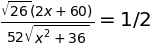

$\left [ \frac{60}{11} + \frac{78 \sqrt{3}}{11}, \quad - \frac{78 \sqrt{3}}{11} + \frac{60}{11}\right ]$

In [8]:
# Página 36 ejercicio 15

texto_ejercicio = r"""Calcula x para que los vectores
$\overrightarrow{u}$ y $\overrightarrow{v}$ formen 60º siendo: """


n_ejercicio = 'pa21e05'

display(md("**"+texto_ejercicio+"**"))

N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

pre_enunciado_latex = [[(6,x),(10,2)],

                    
                      ]

enunciado_latex, enunciado, solucion = [],[],[]

for id, s in enumerate(pre_enunciado_latex) :
    enunciado_latex.append(r"\overrightarrow{u}="+str(s[0])+r" \, \ \overrightarrow{v}="+str(s[1]))
    display(md("$"+enunciado_latex[id]+"$"))
    u = s[0][0]*i+s[0][1]*j
    v = s[1][0]*i+s[1][1]*j
    en=Eq(u.dot(v)/(u.magnitude()*v.magnitude()),cos(rad(60)))
    display(en)
    enunciado.append(en)
    solucion.append(latex(solve(en)))
    
    display(md("$"+solucion[id]+"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=True), ignore_index=True)


In [9]:
# Página 41 ejercicio 27

texto_ejercicio = 'Resolver las siguientes ecuaciones para ángulos en el primer cuadrante:'
n_ejercicio = 'pa21e06'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'\sin{2x}=\frac{\sqrt {3}}{2}',
                   r'\tan{\frac{x}{2}}=1',
                   r'\sin{(3x-\frac{\pi}{2})}=-\frac{\sqrt{2}}{2}',
                   
                  ]
                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    #solucion.append(latex(solve(parse_latex(s)))) 
    solucion.append(latex([nsimplify(i/pi)*pi for i in solve(eval(str(parse_latex(s))))])) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1'), ignore_index=True)


**Resolver las siguientes ecuaciones para ángulos en el primer cuadrante:**

$\sin{2x}=\frac{\sqrt {3}}{2} \rightarrow \left [ \frac{\pi}{6}, \quad \frac{\pi}{3}\right ]$

$\tan{\frac{x}{2}}=1 \rightarrow \left [ \frac{\pi}{2}\right ]$

$\sin{(3x-\frac{\pi}{2})}=-\frac{\sqrt{2}}{2} \rightarrow \left [ \frac{\pi}{12}, \quad \frac{7 \pi}{12}\right ]$

In [3]:
texto_ejercicio = 'Resolver las siguientes ecuaciones:'
n_ejercicio = 'pa21e07'

enunciado_latex = [r'\tan{2x}=\cot{x}',
                  r'\sin{x}\cos{x}=\frac{1}{2}',
                  r'3\sin{x}+\cos{x}=1',            
                 ]
                                       

display(md("**"+texto_ejercicio+"**"))

                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    #solucion.append(latex(solve(parse_latex(s)))) 
    solucion.append(latex([round(float(deg(nsimplify(i/pi)*pi)),3) for i in solve(eval(str(parse_latex(s))))])) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1'), ignore_index=True)


**Resolver las siguientes ecuaciones:**

$\tan{2x}=\cot{x} \rightarrow \left [ -90.0, \quad 90.0, \quad -150.0, \quad 150.0, \quad -30.0, \quad 30.0\right ]$

$\sin{x}\cos{x}=\frac{1}{2} \rightarrow \left [ -135.0, \quad 45.0\right ]$

$3\sin{x}+\cos{x}=1 \rightarrow \left [ 0.0, \quad 143.13\right ]$

In [4]:
ecu = r'\tan(x)+4\cot(x)=5'
ecu = r'\sin(x)(\sin(x)-1)=5\cos^2(x)-4'
#[round(float(deg(nsimplify(i/pi)*pi)),3) for i in solve(eval(str(parse_latex(ecu))))]
solve(eval(str(parse_latex(ecu))))


In [6]:
tan(rad(180)), cot(rad(90))

In [10]:
solve(Eq(2*y/(1-y**2),1/y))

In [14]:
solve(Eq(2*tan(x)/(1-tan(x)**2),1/tan(x)))

In [12]:
solve(tan(x)+sqrt(3)/3)

In [13]:
tan(rad(90))

In [8]:
expand(simplify(tan(2*x)))

In [11]:
# Página 45 ejercicio 12



texto_ejercicio = 'Dado el siguiente número $z$, calcula el valor de $\\frac{z-\overline{z}}{z+\overline{z}}$'
n_ejercicio = 'pa21e08'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'\sqrt{3}-2\sqrt{2}i', 
                   r'\sqrt{2}-2\sqrt{5}i', 
                   
                   
                  ]
                                       




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) :
    enunciado.append(parse_latex(s))
    solucion.append(latex((simplify(eval(str(parse_latex(s).replace('i','I'))))-conjugate(simplify(eval(str(parse_latex(s).replace('i','I'))))))/((simplify(eval(str(parse_latex(s).replace('i','I')))))+conjugate(simplify(eval(str(parse_latex(s).replace('i','I')))))))) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Dado el siguiente número $z$, calcula el valor de $\frac{z-\overline{z}}{z+\overline{z}}$**

$\sqrt{3}-2\sqrt{2}i \rightarrow - \frac{2 \sqrt{6} i}{3}$

$\sqrt{2}-2\sqrt{5}i \rightarrow - \sqrt{10} i$

In [12]:
df_ejercicios.to_csv('ejercicios_auto21.csv', index = False)
df_ejercicios = pd.read_csv('ejercicios_auto21.csv', index_col= None)
escribir_preambulo(fichero, titulo)
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p21e01

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,"A(2, 4), B(7, 3), C(-2, 0) y D(3, -1)","[Point2D(2, 4), Point2D(7, 3), Point2D(-2, 0),...","Point2D(5, -1), Point2D(5, -1): True",¿Son equipolentes los vectores $\overrightarr...,1BC,Autoevaluación 1 ev2,p21e01,1,2,1,False,True


**Ejercicio: **pa21e02

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
1,Las coordenadas de cada uno de ellos respecto ...,"[N.i + (-3)*N.j, (-16)*N.i + 6*N.j, (-2)*N.i +...","[[(-3, 1), (2, -2), (1, -1), (-1, -4)], [(1, -...","Sea \n$\left\lbrace\overrightarrow{ i},\overri...",1BC,Autoevaluación 1 ev2,pa21e02,1,1,1,False,True


**Ejercicio: **pa21e03

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
2,"\overrightarrow{u}=(8, 12) \, \ \overrightarro...","Point(8, 12).is_collinear(Point(2, 3), Point(0...",True,Estudia la dependencia lineal de los siguiente...,1BC,Autoevaluación 1 ev2,pa21e03,1,2,1,True,True
3,"\overrightarrow{u}=(2, 6) \, \ \overrightarrow...","Point(2, 6).is_collinear(Point(4, 7), Point(0,0))",False,Estudia la dependencia lineal de los siguiente...,1BC,Autoevaluación 1 ev2,pa21e03,1,2,1,True,True


**Ejercicio: **pa21e04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
4,"\overrightarrow{u}=(2, -5) \, \ \overrightarro...","['Point(2, -5).dot(Point(6, 2))', ['Point(2, -...","\left [ 2, \quad \left [ \sqrt{29}, \quad 2 \s...",Respecto de una base ortonormal tenemos dos ve...,1BC,Autoevaluación 1 ev2,pa21e04,1,2,1,True,True
5,"\overrightarrow{u}=(1, 4) \, \ \overrightarrow...","['Point(1, 4).dot(Point(3, 8))', ['Point(1, 4)...","\left [ 35, \quad \left [ \sqrt{17}, \quad \sq...",Respecto de una base ortonormal tenemos dos ve...,1BC,Autoevaluación 1 ev2,pa21e04,1,2,1,True,True


**Ejercicio: **pa21e05

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
6,"\overrightarrow{u}=(6, x) \, \ \overrightarrow...","Eq(sqrt(26)*(2*x + 60)/(52*sqrt(x**2 + 36)), 1/2)",\left [ \frac{60}{11} + \frac{78 \sqrt{3}}{11}...,Calcula x para que los vectores\n$\overrightar...,1BC,Autoevaluación 1 ev2,pa21e05,1,2,1,True,True


**Ejercicio: **pa21e06

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
7,\sin{2x}=\frac{\sqrt {3}}{2},"Eq(sin(2*x), sqrt(3)/2)","\left [ \frac{\pi}{6}, \quad \frac{\pi}{3}\rig...",Resolver las siguientes ecuaciones para ángulo...,1BC,Autoevaluación 1 ev2,pa21e06,1,1,1,True,True
8,\tan{\frac{x}{2}}=1,"Eq(tan(x/2), 1)",\left [ \frac{\pi}{2}\right ],Resolver las siguientes ecuaciones para ángulo...,1BC,Autoevaluación 1 ev2,pa21e06,1,1,1,True,True
9,\sin{(3x-\frac{\pi}{2})}=-\frac{\sqrt{2}}{2},"Eq(sin(-pi/2 + 3*x), -sqrt(2)/2)","\left [ \frac{\pi}{12}, \quad \frac{7 \pi}{12}...",Resolver las siguientes ecuaciones para ángulo...,1BC,Autoevaluación 1 ev2,pa21e06,1,1,1,True,True


**Ejercicio: **pa21e07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
10,\tan{2x}=\cot{x},"Eq(tan(2*x), cot(x))","\left [ -90, \quad 90, \quad -150, \quad 150, ...",Resolver las siguientes ecuaciones:,1BC,Autoevaluación 1 ev2,pa21e07,1,1,1,True,True
11,\sin{x}\cos{x}=\frac{1}{2},"Eq(sin(x)*cos(x), 1/2)","\left [ -135, \quad 45\right ]",Resolver las siguientes ecuaciones:,1BC,Autoevaluación 1 ev2,pa21e07,1,1,1,True,True
12,3\sin{x}+\cos{x}=1,"Eq(3*sin(x) + cos(x), 1)","\left [ 0, \quad \frac{360 \operatorname{atan}...",Resolver las siguientes ecuaciones:,1BC,Autoevaluación 1 ev2,pa21e07,1,1,1,True,True


**Ejercicio: **pa21e08

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
13,\sqrt{3}-2\sqrt{2}i,-2*sqrt(2)*i + sqrt(3),- \frac{2 \sqrt{6} i}{3},"Dado el siguiente número $z$, calcula el valor...",1BC,Autoevaluación 1 ev2,pa21e08,1,2,1,True,True
14,\sqrt{2}-2\sqrt{5}i,-2*sqrt(5)*i + sqrt(2),- \sqrt{10} i,"Dado el siguiente número $z$, calcula el valor...",1BC,Autoevaluación 1 ev2,pa21e08,1,2,1,True,True
